# SIDDHI 23070243047
# SHAHEEN 23070243045
# SREEPRIYA 23070243050

In [8]:
import numpy as np
import pandas as pd

# DATASET DESCRIPTION

**This is an entity-level sentiment analysis dataset of twitter. Given a message and an entity, the task is to judge the sentiment of the message about the entity. There are three classes in this dataset: Positive, Negative and Neutral. We regard messages that are not relevant to the entity (i.e. Irrelevant) as Neutral.**

In [9]:
df = pd.read_csv('/kaggle/input/gaming-sentiment-analysis/sentiment analysis/twitter_training.csv')
df2 = pd.read_csv('/kaggle/input/gaming-sentiment-analysis/sentiment analysis/twitter_validation.csv')

# TRAINING SET HAS 74682 RECORDS

In [10]:
print(df.shape)

(74682, 4)


In [ ]:
df.head()

,X_id,Entity,Sentiment,Content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [16]:
df2.head()

,X_id,Entity,Sentiment,Content,Unnamed: 4
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...,NaN
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...,NaN
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...,NaN
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,...",NaN
4,4433,Google,Neutral,Now the President is slapping Americans in the...,NaN


# EXPLORATORY DATA ANALYSIS

In [17]:
df.isnull().sum()

X_id           0
Entity         0
Sentiment      0
Content      686
dtype: int64

In [18]:
df['Entity'].unique()

array(['Borderlands', 'CallOfDutyBlackopsColdWar', 'Amazon', 'Overwatch',
       'Xbox(Xseries)', 'NBA2K', 'Dota2', 'PlayStation5(PS5)',
       'WorldOfCraft', 'CS-GO', 'Google', 'AssassinsCreed', 'ApexLegends',
       'LeagueOfLegends', 'Fortnite', 'Microsoft', 'Hearthstone',
       'Battlefield', 'PlayerUnknownsBattlegrounds(PUBG)', 'Verizon',
       'HomeDepot', 'FIFA', 'RedDeadRedemption(RDR)', 'CallOfDuty',
       'TomClancysRainbowSix', 'Facebook', 'GrandTheftAuto(GTA)',
       'MaddenNFL', 'johnson&johnson', 'Cyberpunk2077',
       'TomClancysGhostRecon', 'Nvidia'], dtype=object)

In [19]:
df1 = df.dropna(subset=['Content'])

In [20]:
print(df.shape)

(74682, 4)


In [21]:
print(df1.shape)

(73996, 4)


In [22]:
df1.isnull().sum()

X_id         0
Entity       0
Sentiment    0
Content      0
dtype: int64

In [23]:
df1['Sentiment'].unique()

array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

In [24]:
entity_counts = df1['Entity'].value_counts()
print("Count of unique values in 'Entity':\n", entity_counts)

Count of unique values in 'Entity':
 Entity
LeagueOfLegends                      2377
MaddenNFL                            2377
CallOfDuty                           2376
Verizon                              2365
TomClancysRainbowSix                 2364
Facebook                             2362
Microsoft                            2361
Dota2                                2359
WorldOfCraft                         2357
ApexLegends                          2353
NBA2K                                2343
CallOfDutyBlackopsColdWar            2343
johnson&johnson                      2324
FIFA                                 2324
TomClancysGhostRecon                 2321
Overwatch                            2316
Battlefield                          2316
GrandTheftAuto(GTA)                  2293
HomeDepot                            2292
PlayStation5(PS5)                    2291
Hearthstone                          2286
CS-GO                                2284
Xbox(Xseries)                   

In [25]:
senti_counts = df1['Sentiment'].value_counts()
print("Count of unique values in 'Entity':\n", senti_counts)

Count of unique values in 'Entity':
 Sentiment
Negative      22358
Positive      20655
Neutral       18108
Irrelevant    12875
Name: count, dtype: int64


# SENTIMENT INTENSITY ANALYSER

In [26]:
import nltk

In [27]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

/opt/conda/lib/python3.10/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [28]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

# **In original data we have mislabelling of data in SENTIMENT Column which has categories as (positive,negative,irrelevant,neutral) so we are creating a new Column and performing sentiment analysis using vader library.**

# **Creating a new column col2 which would give sentiment as 'positive','negative','neutral'**

In [29]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk



# Initialize the SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Load your dataset
df1['Content'] = df1['Content'].fillna('').astype(str)


def assign_sentiment_label(text):
    score = sia.polarity_scores(text)['compound']
    if score > 0.05:
        return 'positive'
    elif score < -0.05:
        return 'negative'
    else:
        return 'neutral'


# Apply the function to the Content column to create the new column 'col2'
df1['col2'] = df1['Content'].apply(assign_sentiment_label)

# Save the updated dataset to a new CSV file
df1.to_csv('twitter_training_with_sentiment.csv', index=False)

# Print the first few rows of the updated dataset
print(df1.head())


/tmp/ipykernel_30/3230646561.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Content'] = df1['Content'].fillna('').astype(str)
/tmp/ipykernel_30/3230646561.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['col2'] = df1['Content'].apply(assign_sentiment_label)


   X_id       Entity Sentiment  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                             Content      col2  
0  im getting on borderlands and i will murder yo...  negative  
1  I am coming to the borders and I will kill you...  negative  
2  im getting on borderlands and i will kill you ...  negative  
3  im coming on borderlands and i will murder you...  negative  
4  im getting on borderlands 2 and i will murder ...  negative  


In [30]:
# Convert both columns to lowercase
df1['Sentiment'] = df1['Sentiment'].str.lower()
df1['col2'] = df1['col2'].str.lower()

# Filter matching rows and count for each category
matching_counts = df1[df1['Sentiment'] == df1['col2']]['Sentiment'].value_counts()

# Display the counts
print("Matching counts for each category:")
print(matching_counts)


Matching counts for each category:
Sentiment
positive    13690
negative    12571
neutral      4128
Name: count, dtype: int64


/tmp/ipykernel_30/2931443039.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Sentiment'] = df1['Sentiment'].str.lower()
/tmp/ipykernel_30/2931443039.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['col2'] = df1['col2'].str.lower()


In [31]:
# Convert both columns to lowercase
df1['Sentiment'] = df1['Sentiment'].str.lower()
df1['col2'] = df1['col2'].str.lower()

# Filter non-matching rows
non_matching_rows = df1[df1['Sentiment'] != df1['col2']]

# Count non-matching rows by Sentiment category
non_matching_counts = non_matching_rows['Sentiment'].value_counts()

# Display the results
print("Non-matching counts for each category:")
print(non_matching_counts)


Non-matching counts for each category:
Sentiment
neutral       13980
irrelevant    12875
negative       9787
positive       6965
Name: count, dtype: int64


/tmp/ipykernel_30/1858418223.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Sentiment'] = df1['Sentiment'].str.lower()
/tmp/ipykernel_30/1858418223.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['col2'] = df1['col2'].str.lower()


# In below cell you can see from 0,1,2,3,4,5 are lablled positive in SENTIMENT column but in real after performing sentiment analysis using VADER you can see in Col2 they are labelled as negative

In [32]:
df1.head(20)

,X_id,Entity,Sentiment,Content,col2
0,2401,Borderlands,positive,im getting on borderlands and i will murder yo...,negative
1,2401,Borderlands,positive,I am coming to the borders and I will kill you...,negative
2,2401,Borderlands,positive,im getting on borderlands and i will kill you ...,negative
3,2401,Borderlands,positive,im coming on borderlands and i will murder you...,negative
4,2401,Borderlands,positive,im getting on borderlands 2 and i will murder ...,negative
5,2401,Borderlands,positive,im getting into borderlands and i can murder y...,negative
6,2402,Borderlands,positive,So I spent a few hours making something for fu...,positive
7,2402,Borderlands,positive,So I spent a couple of hours doing something f...,positive
8,2402,Borderlands,positive,So I spent a few hours doing something for fun...,positive
9,2402,Borderlands,positive,So I spent a few hours making something for fu...,positive


# HEATMAP 

/tmp/ipykernel_30/1525995558.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Sentiment'] = df1['Sentiment'].str.lower()
/tmp/ipykernel_30/1525995558.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['col2'] = df1['col2'].str.lower()


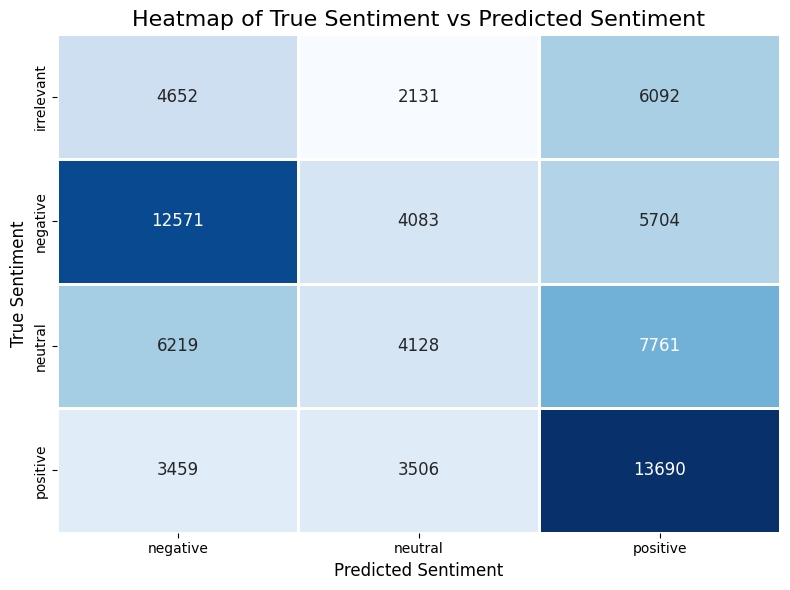

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert both columns to lowercase for consistency
df1['Sentiment'] = df1['Sentiment'].str.lower()
df1['col2'] = df1['col2'].str.lower()

# Create a confusion matrix-style table using pd.crosstab
confusion_matrix = pd.crosstab(df1['Sentiment'], df1['col2'], rownames=['True Sentiment'], colnames=['Predicted Sentiment'])

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={'size': 12}, linewidths=1)

# Add labels and title
plt.title("Heatmap of True Sentiment vs Predicted Sentiment", fontsize=16)
plt.xlabel("Predicted Sentiment", fontsize=12)
plt.ylabel("True Sentiment", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Display the plot
plt.tight_layout()
plt.show()

# BARPLOT

/tmp/ipykernel_30/765449270.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Sentiment'] = df1['Sentiment'].str.lower()
/tmp/ipykernel_30/765449270.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['col2'] = df1['col2'].str.lower()


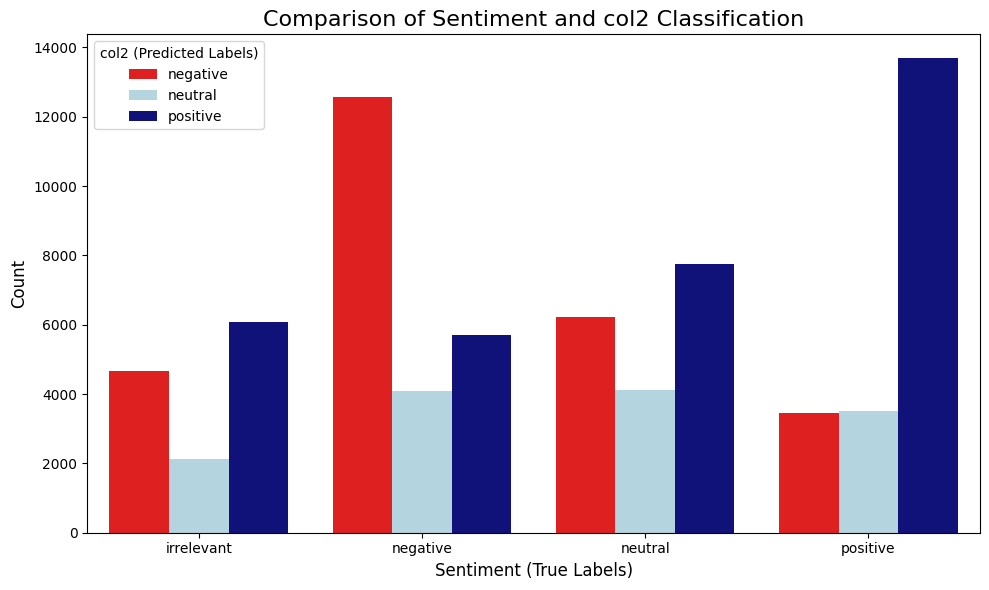

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert both columns to lowercase for consistency
df1['Sentiment'] = df1['Sentiment'].str.lower()
df1['col2'] = df1['col2'].str.lower()

# Create a dataframe to count matches and mismatches
comparison = df1.groupby(['Sentiment', 'col2']).size().reset_index(name='Count')

# Define custom colors for the categories
color_palette = {
    'positive': 'darkblue', 
    'negative': 'red', 
    'neutral': 'lightblue'
}

# Plot the data as a grouped bar chart with custom colors
plt.figure(figsize=(10, 6))
sns.barplot(data=comparison, x='Sentiment', y='Count', hue='col2', palette=color_palette)

# Add labels and title
plt.title("Comparison of Sentiment and col2 Classification", fontsize=16)
plt.xlabel("Sentiment (True Labels)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(title="col2 (Predicted Labels)")
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Display the plot
plt.tight_layout()
plt.show()


In [37]:
# Display the first 50 rows where 'positive' was replaced with 'negative' in 'col2'
positive_to_negative = df1[(df1['Sentiment'] == 'positive') & (df1['col2'] == 'negative')]

# Show the first 50 rows if there are enough rows
positive_to_negative.head(50)


,X_id,Entity,Sentiment,Content,col2
0,2401,Borderlands,positive,im getting on borderlands and i will murder yo...,negative
1,2401,Borderlands,positive,I am coming to the borders and I will kill you...,negative
2,2401,Borderlands,positive,im getting on borderlands and i will kill you ...,negative
3,2401,Borderlands,positive,im coming on borderlands and i will murder you...,negative
4,2401,Borderlands,positive,im getting on borderlands 2 and i will murder ...,negative
5,2401,Borderlands,positive,im getting into borderlands and i can murder y...,negative
23,2404,Borderlands,positive,that was the first borderlands session in a ho...,negative
84,2415,Borderlands,positive,FUCK YESSSSSSSS .,negative
86,2415,Borderlands,positive,FUCK YESSSSSSSS.,negative
87,2415,Borderlands,positive,FUCK YESSSSSSSS<unk>,negative


# CHECKING counts for each category 

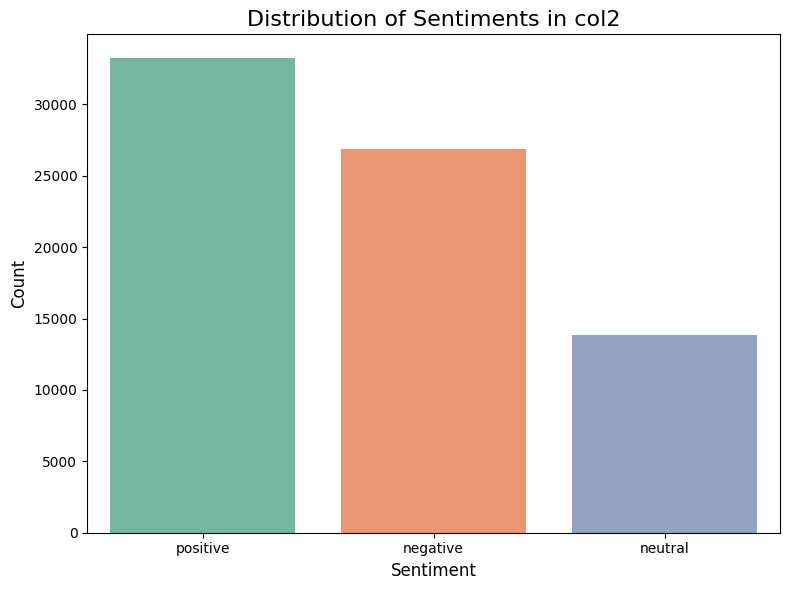

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each sentiment in 'col2'
sentiment_counts = df1['col2'].value_counts()

# Plot the distribution using a barplot
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='Set2')

# Add labels and title
plt.title("Distribution of Sentiments in col2", fontsize=16)
plt.xlabel("Sentiment", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Display the plot
plt.tight_layout()
plt.show()


# SENTIMENTINTENSITYANALYZER VALIDATION DATA

In [39]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk



# Initialize the SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Load your dataset
df2['Content'] = df2['Content'].fillna('').astype(str)


def assign_sentiment_label(text):
    score = sia.polarity_scores(text)['compound']
    if score > 0.05:
        return 'positive'
    elif score < -0.05:
        return 'negative'
    else:
        return 'neutral'


# Apply the function to the Content column to create the new column 'col2'
df2['col2'] = df2['Content'].apply(assign_sentiment_label)

# Save the updated dataset to a new CSV file
df2.to_csv('twitter_validation_with_sentiment.csv', index=False)

# Print the first few rows of the updated dataset
print(df2.head())


   X_id     Entity   Sentiment  \
0  3364   Facebook  Irrelevant   
1   352     Amazon     Neutral   
2  8312  Microsoft    Negative   
3  4371      CS-GO    Negative   
4  4433     Google     Neutral   

                                             Content  Unnamed: 4      col2  
0  I mentioned on Facebook that I was struggling ...         NaN  negative  
1  BBC News - Amazon boss Jeff Bezos rejects clai...         NaN   neutral  
2  @Microsoft Why do I pay for WORD when it funct...         NaN  negative  
3  CSGO matchmaking is so full of closet hacking,...         NaN   neutral  
4  Now the President is slapping Americans in the...         NaN  positive  


In [40]:
# Convert both columns to lowercase
df2['Sentiment'] = df2['Sentiment'].str.lower()
df2['col2'] = df2['col2'].str.lower()

# Filter non-matching rows
non_matching_rows = df2[df2['Sentiment'] != df2['col2']]

# Count non-matching rows by Sentiment category
non_matching_counts = non_matching_rows['Sentiment'].value_counts()

# Display the results
print("Non-matching counts for each category:")
print(non_matching_counts)


Non-matching counts for each category:
Sentiment
neutral       237
irrelevant    172
negative      114
positive       81
Name: count, dtype: int64


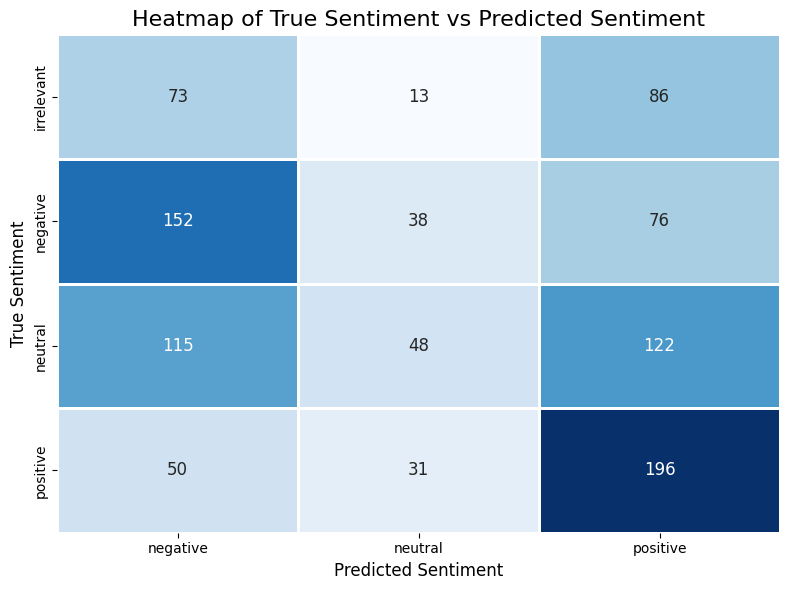

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert both columns to lowercase for consistency
df2['Sentiment'] = df2['Sentiment'].str.lower()
df2['col2'] = df2['col2'].str.lower()

# Create a confusion matrix-style table using pd.crosstab
confusion_matrix = pd.crosstab(df2['Sentiment'], df2['col2'], rownames=['True Sentiment'], colnames=['Predicted Sentiment'])

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={'size': 12}, linewidths=1)

# Add labels and title
plt.title("Heatmap of True Sentiment vs Predicted Sentiment", fontsize=16)
plt.xlabel("Predicted Sentiment", fontsize=12)
plt.ylabel("True Sentiment", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Display the plot
plt.tight_layout()
plt.show()

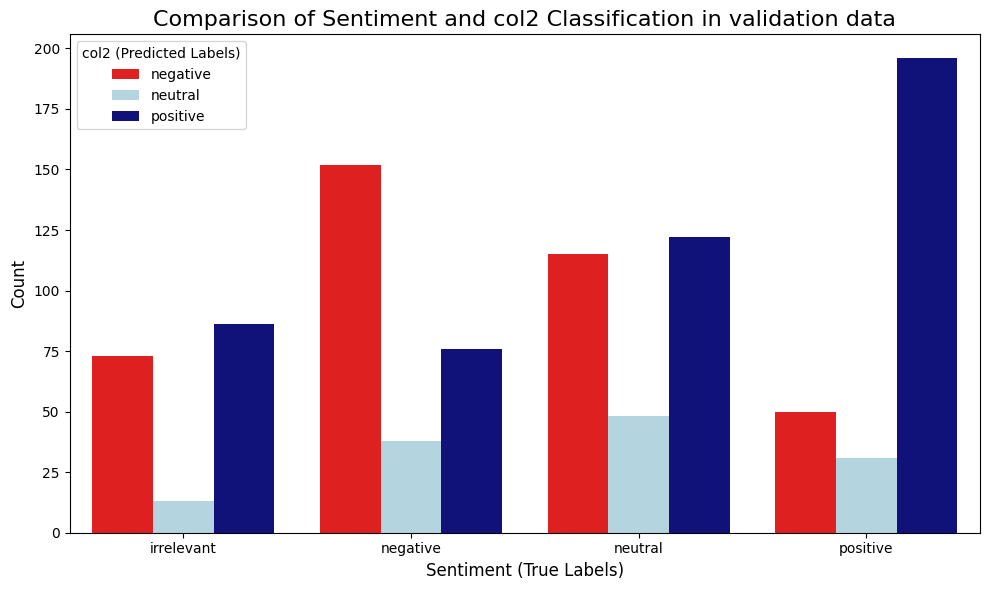

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert both columns to lowercase for consistency
df2['Sentiment'] = df2['Sentiment'].str.lower()
df2['col2'] = df2['col2'].str.lower()

# Create a dataframe to count matches and mismatches
comparison = df2.groupby(['Sentiment', 'col2']).size().reset_index(name='Count')

# Define custom colors for the categories
color_palette = {
    'positive': 'darkblue', 
    'negative': 'red', 
    'neutral': 'lightblue'
}

# Plot the data as a grouped bar chart with custom colors
plt.figure(figsize=(10, 6))
sns.barplot(data=comparison, x='Sentiment', y='Count', hue='col2', palette=color_palette)

# Add labels and title
plt.title("Comparison of Sentiment and col2 Classification in validation data", fontsize=16)
plt.xlabel("Sentiment (True Labels)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(title="col2 (Predicted Labels)")
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Display the plot
plt.tight_layout()
plt.show()


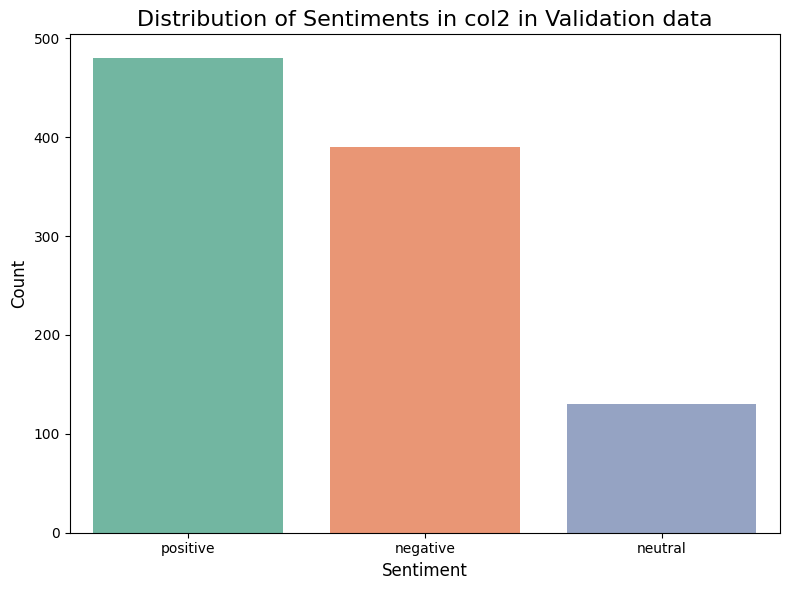

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each sentiment in 'col2'
sentiment_counts = df2['col2'].value_counts()

# Plot the distribution using a barplot
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='Set2')

# Add labels and title
plt.title("Distribution of Sentiments in col2 in Validation data", fontsize=16)
plt.xlabel("Sentiment", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Display the plot
plt.tight_layout()
plt.show()


# WORD CLOUD

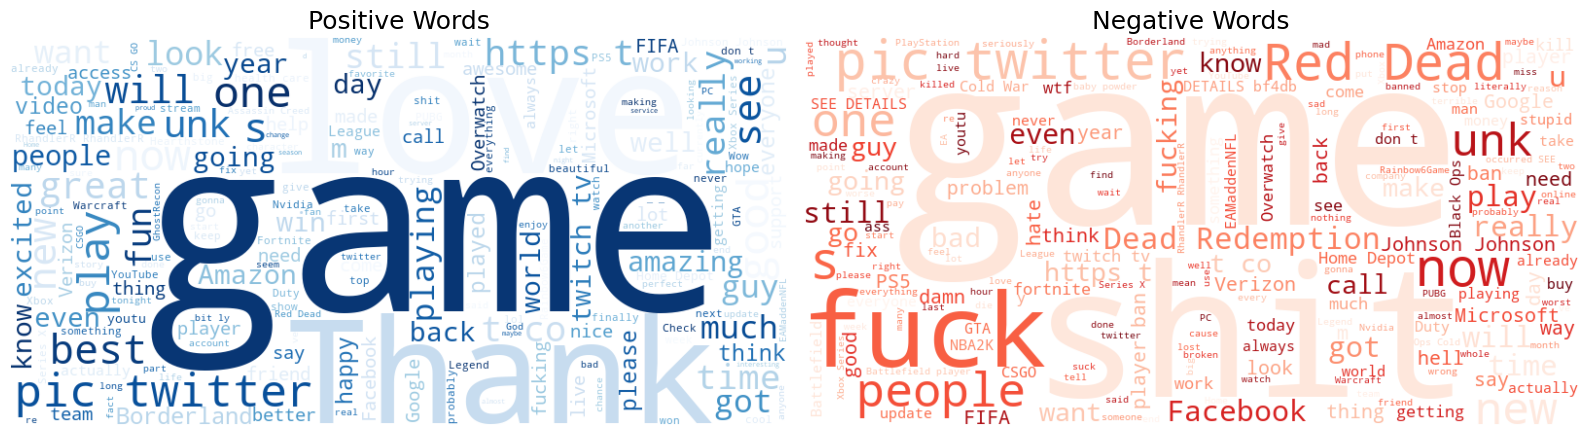

In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter the Content based on positive and negative labels in 'col2'
positive_text = " ".join(df_train[df_train['col2'] == 'positive']['Content'].astype(str))
negative_text = " ".join(df_train[df_train['col2'] == 'negative']['Content'].astype(str))

# Create WordCloud objects
positive_wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Blues').generate(positive_text)
negative_wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(negative_text)

# Plot the word clouds
plt.figure(figsize=(16, 8))

# Positive Word Cloud
plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title("Positive Words", fontsize=18)
plt.axis('off')

# Negative Word Cloud
plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title("Negative Words", fontsize=18)
plt.axis('off')

plt.tight_layout()
plt.show()


In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional, BatchNormalization
from tensorflow.keras.regularizers import l2
import spacy

In [13]:
df_train = pd.read_csv('/kaggle/input/sentiment-vader/twitter_training_with_sentiment.csv')
df_test = pd.read_csv('/kaggle/input/sentiment-vader/twitter_validation_with_sentiment.csv')

In [46]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73996 entries, 0 to 73995
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   X_id       73996 non-null  int64 
 1   Entity     73996 non-null  object
 2   Sentiment  73996 non-null  object
 3   Content    73996 non-null  object
 4   col2       73996 non-null  object
dtypes: int64(1), object(4)
memory usage: 2.8+ MB


In [47]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   X_id        1000 non-null   int64  
 1   Entity      1000 non-null   object 
 2   Sentiment   1000 non-null   object 
 3   Content     1000 non-null   object 
 4   Unnamed: 4  0 non-null      float64
 5   col2        1000 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 47.0+ KB


In [48]:
df_train.duplicated().sum()

2341

In [49]:
df_test.duplicated().sum()

0

In [50]:
df_train.isnull().sum()

X_id         0
Entity       0
Sentiment    0
Content      0
col2         0
dtype: int64

In [51]:
df_test.isnull().sum()

X_id             0
Entity           0
Sentiment        0
Content          0
Unnamed: 4    1000
col2             0
dtype: int64

In [52]:
df_train.drop_duplicates(inplace=True)

In [53]:
df_train.duplicated().sum()

0

In [54]:
df_test.duplicated().sum()

0

In [55]:
df_train.head()

,X_id,Entity,Sentiment,Content,col2
0,2401,Borderlands,positive,im getting on borderlands and i will murder yo...,negative
1,2401,Borderlands,positive,I am coming to the borders and I will kill you...,negative
2,2401,Borderlands,positive,im getting on borderlands and i will kill you ...,negative
3,2401,Borderlands,positive,im coming on borderlands and i will murder you...,negative
4,2401,Borderlands,positive,im getting on borderlands 2 and i will murder ...,negative


In [56]:
df_train.drop(columns=['X_id', 'Entity','Sentiment'], inplace=True)

In [57]:
df_train

,Content,col2
0,im getting on borderlands and i will murder yo...,negative
1,I am coming to the borders and I will kill you...,negative
2,im getting on borderlands and i will kill you ...,negative
3,im coming on borderlands and i will murder you...,negative
4,im getting on borderlands 2 and i will murder ...,negative
...,...,...
73991,Just realized that the Windows partition of my...,positive
73992,Just realized that my Mac window partition is ...,negative
73993,Just realized the windows partition of my Mac ...,negative
73994,Just realized between the windows partition of...,positive


In [58]:
df_test

,X_id,Entity,Sentiment,Content,Unnamed: 4,col2
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...,NaN,negative
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...,NaN,neutral
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...,NaN,negative
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,...",NaN,neutral
4,4433,Google,Neutral,Now the President is slapping Americans in the...,NaN,positive
...,...,...,...,...,...,...
995,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...,NaN,positive
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...,NaN,positive
997,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...,NaN,negative
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.,NaN,positive


In [59]:
df_test.drop(columns=['X_id', 'Entity','Sentiment','Unnamed: 4'], inplace=True)

In [60]:
df_test

,Content,col2
0,I mentioned on Facebook that I was struggling ...,negative
1,BBC News - Amazon boss Jeff Bezos rejects clai...,neutral
2,@Microsoft Why do I pay for WORD when it funct...,negative
3,"CSGO matchmaking is so full of closet hacking,...",neutral
4,Now the President is slapping Americans in the...,positive
...,...,...
995,⭐️ Toronto is the arts and culture capital of ...,positive
996,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...,positive
997,Today sucked so it’s time to drink wine n play...,negative
998,Bought a fraction of Microsoft today. Small wins.,positive


# Preprocessing data

In [61]:
def clean_tweet(tweet):
    # Remove URLs
    tweet = re.sub(r'http\S+|www\S+|https\S+', '', tweet, flags=re.MULTILINE)
    # Remove user @ references and '#' from tweet
    tweet = re.sub(r'\@\w+|\#','', tweet)
    # Remove special characters, numbers, and punctuations
    tweet = re.sub(r'\W', ' ', tweet)
    tweet = re.sub(r'\d', ' ', tweet)
    tweet = re.sub(r'\s+', ' ', tweet)
    tweet = tweet.strip()
    return tweet

In [62]:
df_train['Content'] = df_train['Content'].apply(clean_tweet)

# Clean the test data
df_test['Content'] = df_test['Content'].apply(clean_tweet)

In [63]:
df_train.head()

,Content,col2
0,im getting on borderlands and i will murder yo...,negative
1,I am coming to the borders and I will kill you...,negative
2,im getting on borderlands and i will kill you all,negative
3,im coming on borderlands and i will murder you...,negative
4,im getting on borderlands and i will murder yo...,negative


In [64]:
df_test.head()

,Content,col2
0,I mentioned on Facebook that I was struggling ...,negative
1,BBC News Amazon boss Jeff Bezos rejects claims...,neutral
2,Why do I pay for WORD when it functions so poo...,negative
3,CSGO matchmaking is so full of closet hacking ...,neutral
4,Now the President is slapping Americans in the...,positive


In [65]:
df_train['Content'] = df_train['Content'].str.lower()
df_test['Content'] = df_test['Content'].str.lower()

In [66]:
# Drop rows where 'OriginalTweet' is empty
df_train = df_train.dropna(subset=['Content'])
df_test = df_test.dropna(subset=['Content'])

# Alternatively, if there are rows with just whitespace, use this to remove them as well:
df_train = df_train[df_train['Content'].str.strip() != '']
df_test = df_test[df_test['Content'].str.strip() != '']

# Display the updated dataframe
df_train.head()

,Content,col2
0,im getting on borderlands and i will murder yo...,negative
1,i am coming to the borders and i will kill you...,negative
2,im getting on borderlands and i will kill you all,negative
3,im coming on borderlands and i will murder you...,negative
4,im getting on borderlands and i will murder yo...,negative


In [67]:
df_train.duplicated().sum()

4837

In [68]:
df_train = df_train.drop_duplicates(subset=['Content'])

In [69]:
df_train.shape

(66388, 2)

In [71]:
df_test

,Content,col2
0,i mentioned on facebook that i was struggling ...,negative
1,bbc news amazon boss jeff bezos rejects claims...,neutral
2,why do i pay for word when it functions so poo...,negative
3,csgo matchmaking is so full of closet hacking ...,neutral
4,now the president is slapping americans in the...,positive
...,...,...
995,toronto is the arts and culture capital of can...,positive
996,this is actually a good move tot bring more vi...,positive
997,today sucked so it s time to drink wine n play...,negative
998,bought a fraction of microsoft today small wins,positive


In [70]:
df_train

,Content,col2
0,im getting on borderlands and i will murder yo...,negative
1,i am coming to the borders and i will kill you...,negative
2,im getting on borderlands and i will kill you all,negative
3,im coming on borderlands and i will murder you...,negative
4,im getting on borderlands and i will murder yo...,negative
...,...,...
73991,just realized that the windows partition of my...,positive
73992,just realized that my mac window partition is ...,negative
73993,just realized the windows partition of my mac ...,negative
73994,just realized between the windows partition of...,positive


In [72]:
# Separate features and labels for training data
train_texts = df_train['Content'].values
train_labels = df_train['col2'].values

# Separate features and labels for test data
test_texts = df_test['Content'].values
test_labels = df_test['col2'].values

In [73]:
# Initialize the label encoder
label_encoder = LabelEncoder()

# Fit and transform the labels
train_labels_encoded = label_encoder.fit_transform(train_labels)
test_labels_encoded = label_encoder.transform(test_labels)

In [74]:
# Initialize the tokenizer
tokenizer = Tokenizer()  # You can adjust the number of words

# Fit the tokenizer on the training texts
tokenizer.fit_on_texts(train_texts)
tokenizer.fit_on_texts(test_texts)

In [76]:
# Convert texts to sequences
train_sequences = tokenizer.texts_to_sequences(train_texts)
test_sequences = tokenizer.texts_to_sequences(test_texts)

In [77]:
# Maximum Length in X_train_sequences
maxlen = max(len(tokens) for tokens in train_sequences)
print("Maximum sequence length (maxlen):", maxlen)

Maximum sequence length (maxlen): 166


In [79]:
train_padded = pad_sequences(train_sequences, maxlen=maxlen, padding='post')
test_padded = pad_sequences(test_sequences, maxlen=maxlen, padding='post')

In [80]:
# Embedding Input Size
input_size = np.max(train_padded) + 1
input_size

29385

In [81]:
# Define the model
model = Sequential()

# Add an embedding layer 
model.add(Embedding(input_dim=input_size, output_dim=100, input_shape=(56,)))

# Add a bidirectional LSTM layer with 128 units
model.add(Bidirectional(LSTM(128, kernel_regularizer=l2(0.1), return_sequences=True, recurrent_regularizer=l2(0.1))))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Add another LSTM layer
model.add(Bidirectional(LSTM(64, kernel_regularizer=l2(0.01), recurrent_regularizer=l2(0.01))))
# Add batch normalization layer
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Add a dense layer with 64 units and ReLU activation
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))

# Add dropout regularization
model.add(Dropout(0.5))

# Add the output layer with 5 units for 5 labels and softmax activation
model.add(Dense(3, activation='softmax'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [82]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 56, 100)        │     2,938,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 56, 256)        │       234,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 56, 256)        │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 56, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 128)            │       164,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,347,335 (12.77 MB)

 Trainable params: 3,346,567 (12.77 MB)

 Non-trainable params: 768 (3.00 KB)

In [85]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    train_padded,
    train_labels_encoded ,
    validation_data=(test_padded,test_labels_encoded),
    epochs=10
)

In [ ]:
test_loss, test_accuracy = model.evaluate(test_padded , test_labels_encoded)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import seaborn as sns

# Step 1: Make predictions
predictions = model.predict(test_padded)
predicted_labels = np.argmax(predictions, axis=1)  # Convert probabilities to class labels

# Step 2: Generate the confusion matrix
cm = confusion_matrix(test_labels_encoded, predicted_labels)

# Step 3: Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Step 4: Print classification report for detailed metrics
print("Classification Report:")
print(classification_report(test_labels_encoded, predicted_labels, target_names=['Class 0', 'Class 1']))


In [ ]:
# Save the entire model to a file
model.save('modelNLP.h5') 
model.save('modelNLP.keras')# Saves as an H5 file


In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model('modelNLP.h5')
loaded_model = load_model('modelNLP.keras')